### **2. Data Understanding**
- Dataset merupakan data listing Apartment di Kota Daegu.
- Setiap baris data merepresentasikan informasi terkait properti dan harga.

**Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

untuk memudahkan, nama file diubah yang semulanya 'data_daegu_apartment' menjadi 'daeguapt'

In [3]:
df= pd.read_csv('daeguapt.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


Dari data kita bisa lihat ada beberapa data tipe yaitu object, float, dan interger.

**Attributes Information**


| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType  | object | Tipe Apartemen |
| TimeToSubway | object | Jarak Stasiun Terdekat (min)  |
| SubwayStation | object | Nama Stasiun Terdekat |
| N_FacilitiesNearBy(ETC) | float64 | Jumlah Fasilitas Terdekat |
| N_FacilitiesNearBy(Public Office) | float64 | Jumlah Kantor Pemerintah Terdekat |
| N_SchoolNearBy(University) | float64 | Jumlah Universitas Terdekat |
| N_Parkinglot(Basement) | float64 | Jumlah (Basemen) Lahan Parkir |
| YearBuilt | int64 | Tahun Pembangunan |
| N_FacilitiesInApt | int64 | Jumlah Fasilitas Apartment |
| Size(sqf) | int64 | Luas Apartment |
| SalePrice | int64 | Harga Jual Apartment (Won) |

<br>

In [5]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


## **3. Exploratory Data Analysis (EDA) and Data Preprocessing**

**Exploratory Data Analysis (EDA)**

In [6]:
df.describe(include=['object'])

,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


In [7]:
df.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

<Axes: xlabel='Size(sqf)', ylabel='SalePrice'>

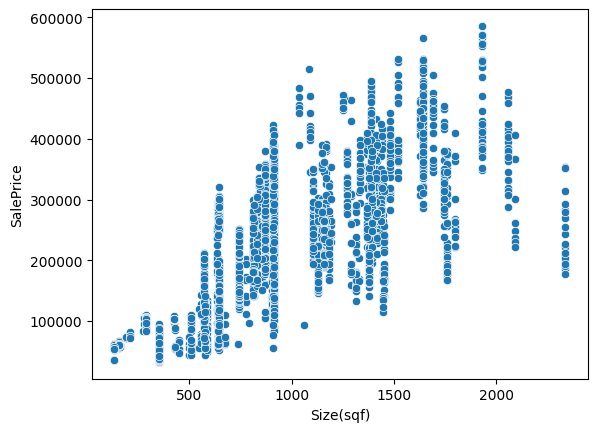

In [8]:
sns.scatterplot(data=df, x='Size(sqf)',y='SalePrice')

<Axes: xlabel='Size(sqf)', ylabel='SalePrice'>

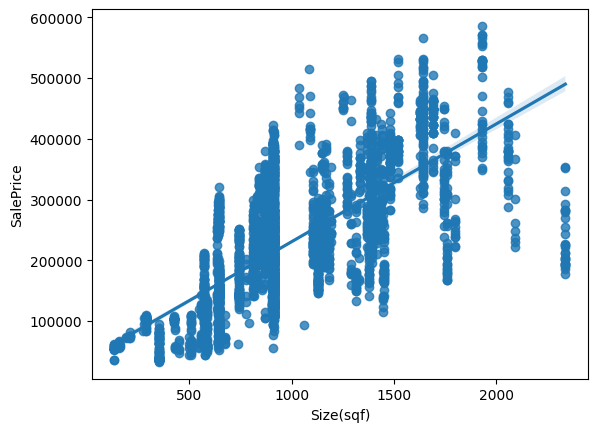

In [9]:
sns.regplot(data=df, x='Size(sqf)',y='SalePrice')

Berdasarkan hasil regplot didapati bahwa hubungan antara Size (sqf) dengan SalePrice bernilai postif pergerakannya.

**Distribution of Daegu Apartment price**

Distribution plot dari fitur *'SalePrice'*

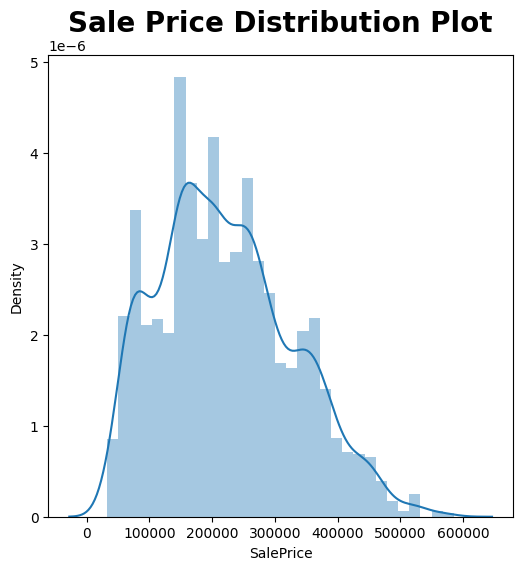

In [10]:
plt.figure(figsize=(6,6))
sns.distplot(df['SalePrice'])
plt.title('Sale Price Distribution Plot', size=20, weight='bold')
plt.show()

Berdasarkan distribution plot *SalePrice* atau harga jual apartemen tersebut, dapat terlihat bahwa terjadi **'right-skewness'** pada fitur tersebut. Untuk selanjutnya akan dilakukan exploring terkait hallway type dengan sellprice.

***Hallway type related to sale price***

Pertama-tama kita akan melihat ada berapa jumlah apartemen berdasarkan HallwayType dan SubwayStation terdekat.

In [11]:
print(f"Jumlah apartemen berdasarkan HallwayType:\n{df['HallwayType'].value_counts()}")
print(f"\nJumlah apartemen berdasarkan SubwayStation:\n{df['SubwayStation'].value_counts()}")

Jumlah apartemen berdasarkan HallwayType:
HallwayType
terraced    2528
mixed       1131
corridor     464
Name: count, dtype: int64

Jumlah apartemen berdasarkan SubwayStation:
SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: count, dtype: int64


Diketahui bahwa apartement yang dijual **didominasi** oleh hallway dengan **tipe berteras** dan **campuran**, dengan subway station terdekat yaitu **kyungbuk__uni_hospital** dan **Myung-duk** subway station. Sekarang kita akan melakukan pengelompokkan sub station terdekat dengan tipe hallway.

In [12]:
#grouping SubwayStation terdekat berdasarkan HallwayTipe
df.groupby(['SubwayStation','HallwayType'])['HallwayType'].count()

SubwayStation          HallwayType
Bangoge                mixed           502
Banwoldang             corridor         50
                       terraced        479
Chil-sung-market       mixed            74
Daegu                  corridor         51
                       terraced         14
Kyungbuk_uni_hospital  corridor         49
                       terraced       1103
Myung-duk              corridor        222
                       mixed           555
                       terraced        267
Sin-nam                corridor         51
                       terraced        416
no_subway_nearby       corridor         41
                       terraced        249
Name: HallwayType, dtype: int64

Dapat dilihat bahwa apartemen yang berada di sekitar subway station memiliki satu atau lebih dari satu tipe hallway.

In [13]:
#grouping SubwayStation terdekat berdasarkan HallwayTipe dan YearBuilt
df.groupby(['SubwayStation','YearBuilt','HallwayType'])['HallwayType'].count()

SubwayStation          YearBuilt  HallwayType
Bangoge                2005       mixed          502
Banwoldang             2007       terraced       433
                       2014       corridor        50
                                  terraced        46
Chil-sung-market       1997       mixed           67
                       2003       mixed            7
Daegu                  1985       corridor        51
                       2015       terraced        14
Kyungbuk_uni_hospital  1978       corridor        49
                       1986       terraced       222
                       2006       terraced       139
                       2007       terraced       420
                       2013       terraced       322
Myung-duk              1980       terraced         4
                       1992       corridor       222
                                  mixed          104
                       1993       mixed          451
                       2006       terraced       108


Insight:
- Apartemen yang dekat dengan **subway station Bangoge** dibangun pada tahun 2005 dengan tipe hallway mixed.
- Apartemen yang dekat dengan **subway station Banwoldang** mayoritas dibangun pada tahun 2007 dengan tipe hallway berteras. 
- Apartemen yang dekat dengan **subway station Chil-sung-market** mayoritas dibangun pada tahun 1997 dengan tipe hallway mixed.
- Apartemen yang dekat dengan **subway station Daegu** mayoritas dibangun pada tahun 1985 dengan tipe hallway koridor.
- Apartemen yang dekat dengan **subway station Kyungbuk_uni_hospital** mayoritas dibangun pada tahun 2007 dengan tipe hallway berteras.
- Apartemen yang dekat dengan **subway station Myung-duk** mayoritas dibangun pada tahun 1993 dengan tipe hallway mixed.
- Apartemen yang dekat dengan **subway station Sin-nam** mayoritas dibangun pada tahun 2006 dengan tipe hallway berteras.
- Untuk apartemen yang tidak dekat dengan subway station manapun didominasi bangunan yang dibangun pada tahun 2009 dengan tipe hallway teras.

Kemudian kita akan mencari tahu berapa median SalePrice untuk setiap subway station:

In [14]:
# cek median SalePrice untuk setiap SubwayStation
df_med_saleprice = df.groupby(by=['SubwayStation']).agg({'SalePrice':'median'}).reset_index()
df_med_saleprice = df_med_saleprice.set_index('SubwayStation')
df_med_saleprice = df_med_saleprice.sort_values('SalePrice', ascending =False)
df_med_saleprice.head()

,SalePrice
SubwayStation,
Banwoldang,315929.0
Sin-nam,247787.0
Kyungbuk_uni_hospital,238938.0
no_subway_nearby,207743.0
Bangoge,167035.0


In [15]:
#plot SalePrice median untuk setiap HallwayType apartemen di setiap SubwayStation
from IPython.display import display

neighbour_pivot = df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')
display(neighbour_pivot)

HallwayType,corridor,mixed,terraced
SubwayStation,,,
Bangoge,NaN,167035.0,NaN
Banwoldang,101769.0,NaN,337168.0
Chil-sung-market,NaN,88495.0,NaN
Daegu,70796.0,NaN,300884.0
Kyungbuk_uni_hospital,163716.0,NaN,244911.0
Myung-duk,65486.0,149557.0,271681.0
Sin-nam,87610.0,NaN,256637.0
no_subway_nearby,58407.0,NaN,243362.0


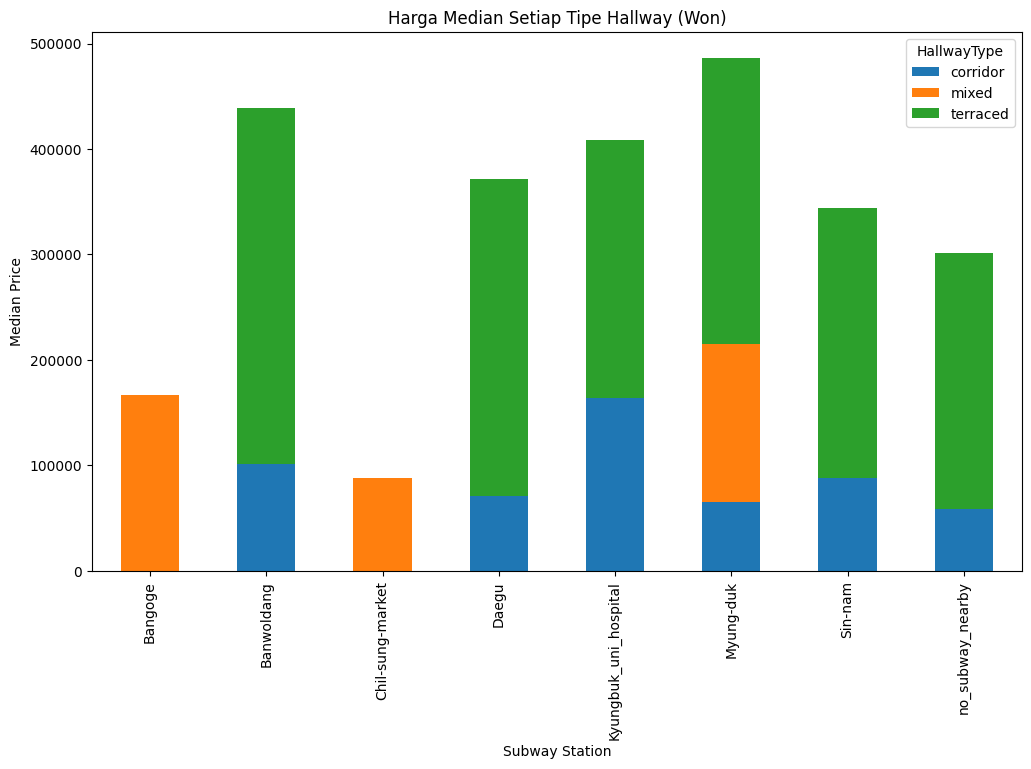

In [16]:
pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Subway Station')
pivot_plot.set_ylabel('Median Price')
pivot_plot.set_title('Harga Median Setiap Tipe Hallway (Won)')
plt.show()

Insight:
- Harga jual (SalePrice) median tertinggi untuk setiap HallwayType berada di SubwayStation yang bervariasi-
- Apartemen di sekitar SubwayStation Myung-duk misalnya, memiliki nilai median tertinggi pada HallwayType berteras, sedangkan untuk apartment yang dekat dengan subway station Bangoge dan Chil-sung-market untuk HallwayType mixed. 
- Dapat dilihat bahwa untuk apartment dengan hallway tipe berkoridor mayoritas memiliki median price yang lebih murah dibandingkan hallway tipe mixed maupun berteras.

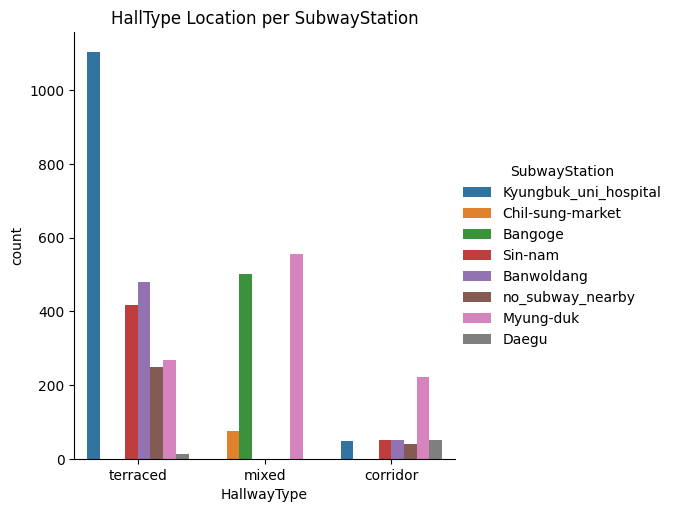

In [17]:
#Persebaran HallwayType berdasarkan lokasi SubwayStation
sns.catplot(x='HallwayType', kind='count', hue='SubwayStation', data=df);
plt.title('HallType Location per SubwayStation')
plt.show()

Insight:
- Berdasarkan data persebaran diatas kita dapat mengetahui bahwa apartemen dengan HallwayType terraced mayoritas berada di area dekat subway station Kyungbuk_uni hospital.
- Sementara itu, untuk HallwayType mixed mayoritas berlokasi di Myungduk.
- Hal ini memperlihatkan indikasi pilihan pembeli yang lebih memilih HallwayType terraced kemudian disusul dengan HallwayType mixed daripada corridor.

## **Data Preprocessing**

**Data Cleaning**

Tahap ini akan dilakukan cleaning pada data yang akan digunakan untuk tahapan analisis selanjutnya. Pada tahap ini akan dilakukan beberapa langkah, yaitu :
- Drop fitur yang kurang relevan dengan permasalahan
- Penanganan *missing value*
- Penanganan data duplikat

In [18]:
#Duplikasi dataframe
df_model = df.copy()

In [19]:
#cek info lebih detail untuk setiap fitur
listItem=[]

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(3).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[mixed, corridor, terraced]"
1,TimeToSubway,object,0,0.0,5,"[15min~20min, 10min~15min, 5min~10min]"
2,SubwayStation,object,0,0.0,8,"[Bangoge, Chil-sung-market, Daegu]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[0.0, 2.0, 1.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[4.0, 0.0, 5.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[1.0, 0.0, 5.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[79.0, 56.0, 1270.0]"
7,YearBuilt,int64,0,0.0,16,"[1986, 2013, 2014]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[5, 2, 9]"
9,Size(sqf),int64,0,0.0,89,"[2337, 636, 1394]"


In [20]:
#Cek missing value
df_model.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

Tidak terdapat missing value pada dataset. Oleh karena itu, tidak perlu dilakukan penanganan khusus untuk pengisian missing value ataupun drop fitur tertentu.


#### **Duplicate Data**

Selanjutnya, dilakukan pula pengecekan record data yang memiliki value duplikat untuk setiap fiturnya.

In [21]:
#Cek duplikasi data
df_model.duplicated().sum()
dup = df_model[df_model.duplicated()]
print("Jumlah duplikasi data : " + str(df_model.duplicated().sum()))

Jumlah duplikasi data : 1422


Setelah dilakukan pengecekan, telah ditemukan 1422 record data yang memiliki value duplikat pada dataset.

Oleh karena itu, dilakukan drop value duplikat dengan tetap meninggalkan satu record value paling pertama.

In [22]:
df_model.drop_duplicates(keep='first', inplace=True)

In [23]:

df_model.duplicated().sum()

np.int64(0)

Setelah dilakukan pengecekan ulang, dapat dilihat bahwa tidak ditemukan lagi record value yang duplikat.

In [24]:
#cek dataset info
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2701 non-null   object 
 1   TimeToSubway                      2701 non-null   object 
 2   SubwayStation                     2701 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64
 5   N_SchoolNearBy(University)        2701 non-null   float64
 6   N_Parkinglot(Basement)            2701 non-null   float64
 7   YearBuilt                         2701 non-null   int64  
 8   N_FacilitiesInApt                 2701 non-null   int64  
 9   Size(sqf)                         2701 non-null   int64  
 10  SalePrice                         2701 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 253.2+ KB


Diketahui masih ada beberapa data yang berbentuk float, untuk memudahkan data yang masih bertipe float akan diubah menjadi data int. Mengingat kita juga butuh hallway type untuk melihat korelasinya maka kita gunakan label encoder, hal ini bertujuan agar data yang berupa string dapat diberi label numerik.

In [25]:
#mengubah tipe data seluruh N_FacilitiesNearBy dan N_Parkinglot(Basement) menjadi int
df_model['N_FacilitiesNearBy(ETC)'] = df_model['N_FacilitiesNearBy(ETC)'].astype(np.int64)
df_model['N_FacilitiesNearBy(PublicOffice)'] = df_model['N_FacilitiesNearBy(PublicOffice)'].astype(np.int64)
df_model['N_SchoolNearBy(University)'] = df_model['N_SchoolNearBy(University)'].astype(np.int64)
df_model['N_Parkinglot(Basement)'] = df_model['N_Parkinglot(Basement)'].astype(np.int64)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   SubwayStation                     2701 non-null   object
 3   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 5   N_SchoolNearBy(University)        2701 non-null   int64 
 6   N_Parkinglot(Basement)            2701 non-null   int64 
 7   YearBuilt                         2701 non-null   int64 
 8   N_FacilitiesInApt                 2701 non-null   int64 
 9   Size(sqf)                         2701 non-null   int64 
 10  SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 253.2+ KB


In [26]:
encoder = LabelEncoder()
df_model['HallwayType_encoded'] = encoder.fit_transform(df_model['HallwayType'])
print(df_model[['HallwayType', 'HallwayType_encoded']].drop_duplicates())

  HallwayType  HallwayType_encoded
0    terraced                    2
2       mixed                    1
9    corridor                    0


Kemudian kita akan cek deskripsi statistik untuk fitur numerikal.

In [27]:
#cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,HallwayType_encoded
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790,1.492780
std,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321,0.706349
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000,0.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000,1.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000,2.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000,2.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000,2.000000


In [28]:
#cek YearBuilt yang < 2000
df_model[df_model['YearBuilt'] < 2000]['YearBuilt'].count()

np.int64(858)

In [29]:
#drop data dengan YearBuilt < 2000
df_model = df_model[(df_model['YearBuilt'] < 2000)]

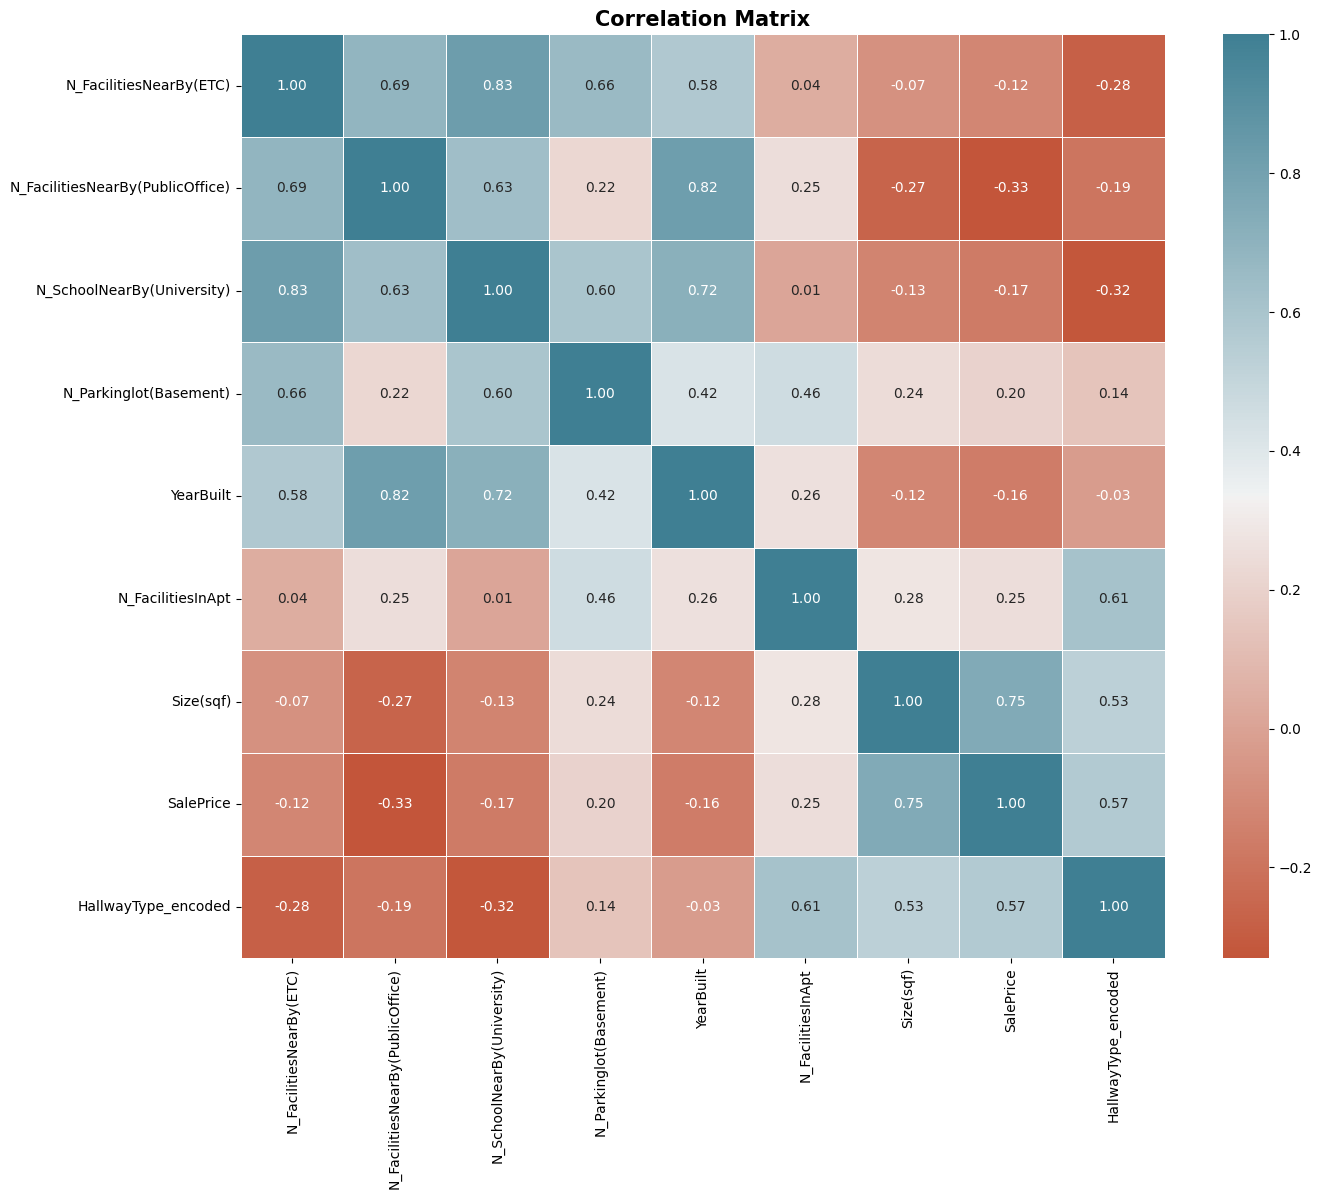

In [30]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.select_dtypes(include=['number']).corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Sekarang kita akan mengecek outlier pada dataset pada setiap fitur.

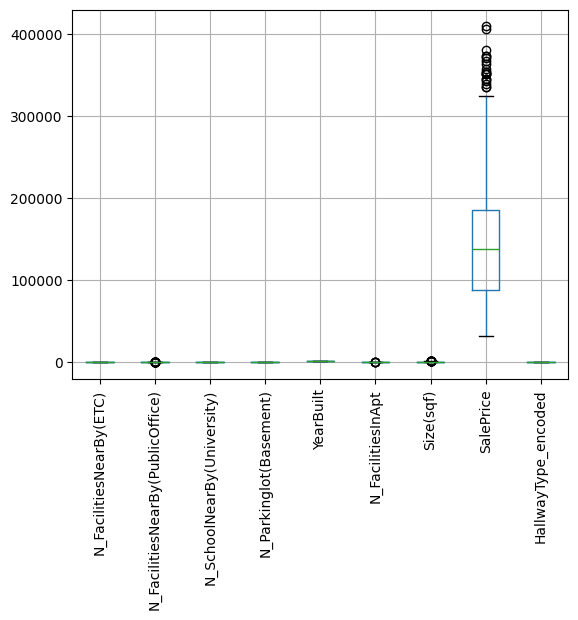

In [31]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90)
plt.show()

Berdasarkan hasil boxplot diketahui adanya outlier pada kolom SalePrice, N_FacilitiesApt, N_FacilitiesNearBy(PublicOffice) dan Size (sqf). Dalam kasus ini, kita akan mempertahankan outlier yang ada. Hal ini dilakukan untuk kebutuhan pemodelan melihat adanya hubungan yang menarik antar kolom N_FacilitiesApt, N_FacilitiesNearBy(PublicOffice) dan Size (sqf) dengan kolom SalePrice setelah dilakukan matriks korelasi menggunakan heatmap.

Misalnya saja korelasi antara kolom N_FacilitiesNearBy(PublicOffice) yang menunjukan korelasi negatif terhadap SalePrice, dimana semakin banyak fasilitas public office yang ada didekat apartemen maka harganya akan semakin rendah. Hal ini diduga karena adanya Hunian subsidi dimana harganya lebih murah karena didanai pemerintah Korea Selatan untuk kalangan yang berpenghasilan rendah. Sedangkan untuk kolom N_FacilitiesApt dan Size (sqf) terhadap kolom SalePrice menunjukkan korelasi positif.

### **Feature Engineering**

Kita akan melakukan Feature engineering untuk data numerikal

**a. SalePrice**

In [32]:
#cek deskriptif statistik kolom SalePrice
df_model['SalePrice'].describe()

count       858.000000
mean     147697.102564
std       72112.146474
min       32743.000000
25%       88495.000000
50%      138053.000000
75%      185840.000000
max      409734.000000
Name: SalePrice, dtype: float64

In [33]:
#cek SalePrice > 521901.5
df_model[df_model['SalePrice'] > 521901.5].count()['SalePrice']

np.int64(0)

<hr>

### **4. Modeling**